In [155]:
using ITensors, ITensorMPS
using LinearAlgebra
# using SparseArrays
using Plots
# using JLD2

In [221]:
include("../src/main.jl")
include("../src/observables.jl")
include("../src/states.jl")
include("../src/doubled_measurements.jl")
include("../src/singled_measurements.jl")
include("../src/circuits.jl")

pure_sample (generic function with 1 method)

In [ ]:
observables = [:SR, :Ic, :κEA, :κ2]
L = 4
T = 2L
λ = 0.5
δ = 0.7
q = 0.1
θ = 0.2
samples = 100

means, vars = sample(L, T, λ, δ, q, θ, θ, samples; ref=true, final_perfect=false, observables=observables)

(Dict{Symbol, Vector{ComplexF64}}(:κEA => [0.08 + 0.0im, 0.08 + 0.0im, 0.057130292571940286 + 1.5123547384563003e-17im, 0.020158006423848 + 2.5337806719290902e-19im, 0.02491081597869985 + 1.710557988583681e-18im, 0.020046239786021477 - 3.8390607455936917e-10im, 0.023325536851263783 + 2.4045315541346544e-8im, 0.02002830548606263 - 3.020024036110611e-10im, 0.02364492582677849 - 4.5872063194950527e-10im, 0.02003765349746643 + 5.502208731452589e-10im, 0.023599222619224203 + 2.8895817951981935e-8im, 0.02002897686727948 - 1.1479689901323365e-9im, 0.023526939826389127 + 6.429811488752916e-9im, 0.02002992648381184 + 8.469937468635911e-10im, 0.0233639515471878 + 2.421139546683063e-9im, 0.020036935902235927 - 4.3125105621842803e-10im, 0.02352179780635042 - 1.667466506300224e-8im, 0.02003084995402947 + 3.650368299303462e-10im], :SR => [1.0 + 0.0im, 1.0 + 0.0im, 0.9999999999999999 + 0.0im, 0.9834382706211584 + 0.0im, 0.9749785250630082 + 0.0im, 0.9381500186395201 + 0.0im, 0.9331086028959856 + 0.0i

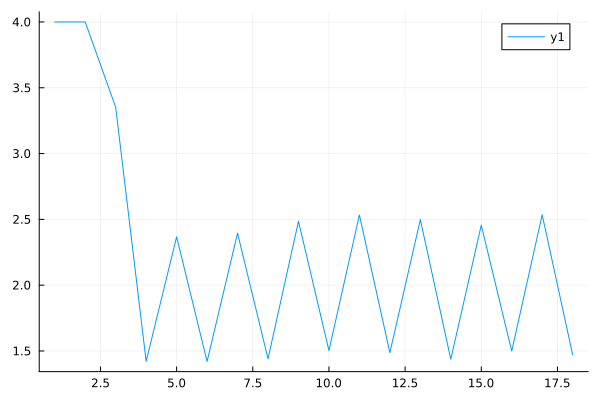

In [261]:
plot(real.(means[:κ2]))

In [251]:
observables = [:pure_SR, :pure_κEA]
L = 12
T = 2L
λ = 0.5
δ = 0.7
# q = 0.1
θ = 0.2
samples = 100

means, vars = pure_sample(L, T, λ, δ, θ, θ, samples; ref=true, final_perfect=true, observables=observables)

(Dict{Symbol, Vector{ComplexF64}}(:pure_κEA => [12.0 + 0.0im, 12.0 + 0.0im, 9.152595782105871 + 4.1993752077866725e-34im, 2.0885361100511637 - 3.5110922042700724e-19im, 2.5368044261828637 + 1.7216572008421669e-18im, 1.224772331181977 + 7.772777872004825e-19im, 2.064438820840712 - 2.1190628840624186e-18im, 1.2514688817418582 + 8.88320858197479e-19im, 2.139463509954151 - 6.2408160227895404e-18im, 1.2747183329732268 - 6.199032133743349e-19im  …  2.067877677238528 - 1.551945261734094e-19im, 1.2351479103133312 - 1.1948653464903523e-17im, 2.073194031269739 - 6.5019506799378205e-18im, 1.2420900008413105 - 5.327475349979351e-18im, 1.998349275628627 - 8.987073455151509e-18im, 1.231502552190503 + 8.54817443300268e-18im, 2.0460172933039984 - 3.827049131372064e-18im, 1.246874147559534 - 7.534203360169542e-19im, 2.028206192663606 + 2.583724829555188e-18im, 12.0 - 4.2106455621047325e-18im], :pure_SR => [1.0 + 0.0im, 1.0 + 0.0im, 0.9999999999999999 + 0.0im, 0.9999913696983143 + 0.0im, 0.9998532790789

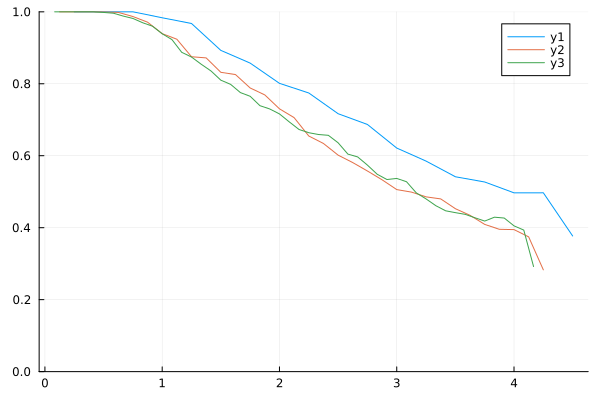

In [252]:
plot!(collect(1:2T+2)/L, real.(means[:pure_SR]), ylim=(0,1))

In [205]:
ψ, sites = pure_ghz(4; ref=true)

(MPS
[1] ((dim=2|id=549|"Qubit,Site,n=1"), (dim=2|id=793|"Link,l=1"))
[2] ((dim=2|id=86|"Qubit,Site,n=2"), (dim=2|id=780|"Link,l=2"), (dim=2|id=793|"Link,l=1"))
[3] ((dim=2|id=99|"Qubit,Site,n=3"), (dim=2|id=109|"Link,l=3"), (dim=2|id=780|"Link,l=2"))
[4] ((dim=2|id=714|"Qubit,Site,n=4"), (dim=2|id=92|"Link,l=4"), (dim=2|id=109|"Link,l=3"))
[5] ((dim=2|id=731|"Qubit,Site,n=5"), (dim=2|id=92|"Link,l=4"))
, Index{Int64}[(dim=2|id=549|"Qubit,Site,n=1"), (dim=2|id=86|"Qubit,Site,n=2"), (dim=2|id=99|"Qubit,Site,n=3"), (dim=2|id=714|"Qubit,Site,n=4"), (dim=2|id=731|"Qubit,Site,n=5")])

In [206]:
ψ, _, _ = singled_measure(ψ, PauliX, 0.6, 1:4)
ψ /= norm(ψ)

MPS
[1] ((dim=2|id=549|"Qubit,Site,n=1"), (dim=2|id=574|"Link,l=1"))
[2] ((dim=2|id=86|"Qubit,Site,n=2"), (dim=2|id=574|"Link,l=1"), (dim=2|id=693|"Link,l=2"))
[3] ((dim=2|id=99|"Qubit,Site,n=3"), (dim=2|id=693|"Link,l=2"), (dim=2|id=447|"Link,l=3"))
[4] ((dim=2|id=714|"Qubit,Site,n=4"), (dim=2|id=92|"Link,l=4"), (dim=2|id=447|"Link,l=3"))
[5] ((dim=2|id=731|"Qubit,Site,n=5"), (dim=2|id=92|"Link,l=4"))


In [207]:
pure_SR(ψ)

0.7157505248167579

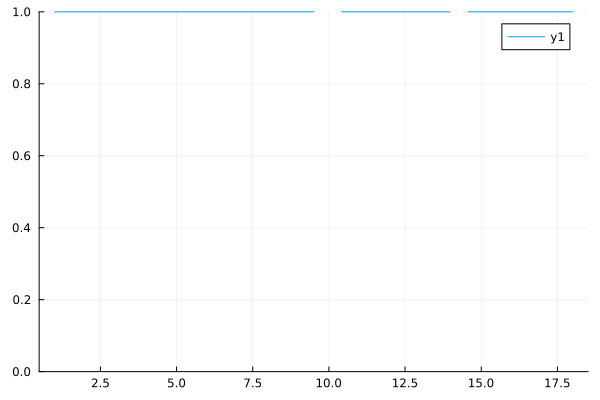

In [170]:
plot(real.(means[:pure_SR]), ylim=(0,1))

In [126]:
ρ, data = circuit(L, T, λ, δ, q, θ, θ; ref=false, observables=observables)

0.12499999999999992
0.015624999999999972
0.015624999999999972
0.015624999999999972
0.015624999999999976
0.015624999999999976
0.015624999999999972
0.12499999999999992
0.015624999999999972
0.015624999999999972
0.015624999999999972
0.015624999999999976
0.015624999999999976
0.015624999999999972
0.12499999999999992
0.015624999999999976
0.015624999999999976
0.015624999999999976
0.01562499999999998
0.01562499999999998
0.015624999999999976
0.012750400891425394
4.161861706036771e-6
4.161861706036775e-6
4.161861706036787e-6
7.744070399908566e-5
7.744070399908569e-5
7.744070399908557e-5
0.11276529658493602
4.936663228658204e-5
0.0009330892693973717
0.0070851860597720695
0.0004756398906367143
0.00295115909410856
0.0040509779669760495
0.0115024219047866
2.4505444160654574e-7
2.48438127078021e-7
3.511563497172606e-5
2.3573438412618543e-6
7.860719155172595e-7
1.0790150446562582e-6
0.1511561419632662
0.0008919488528754097
0.002586223881059879
0.00797956512660512
0.003003668865502779
0.0083299684524409

(MPS
[1] ((dim=2|id=366|"Qubit,Site,n=1"), (dim=2|id=354|"Link,l=1"))
[2] ((dim=2|id=617|"Qubit,Site,n=2"), (dim=4|id=48|"Link,l=2"), (dim=2|id=354|"Link,l=1"))
[3] ((dim=2|id=150|"Qubit,Site,n=3"), (dim=8|id=204|"Link,l=3"), (dim=4|id=48|"Link,l=2"))
[4] ((dim=2|id=225|"Qubit,Site,n=4"), (dim=10|id=768|"Link,l=4"), (dim=8|id=204|"Link,l=3"))
[5] ((dim=2|id=921|"Qubit,Site,n=5"), (dim=8|id=610|"Link,l=5"), (dim=10|id=768|"Link,l=4"))
[6] ((dim=2|id=756|"Qubit,Site,n=6"), (dim=4|id=345|"Link,l=6"), (dim=8|id=610|"Link,l=5"))
[7] ((dim=2|id=658|"Qubit,Site,n=7"), (dim=2|id=757|"Link,l=7"), (dim=4|id=345|"Link,l=6"))
[8] ((dim=2|id=808|"Qubit,Site,n=8"), (dim=2|id=757|"Link,l=7"))
, Dict{Symbol, Vector{ComplexF64}}(:ZZ => [3.9999999999999996 + 0.0im, 3.9999999999999996 + 0.0im, 4.0 + 0.0im, 2.2752662721893486 + 0.0im, 1.151263070356403 + 0.0im, 1.1542790029777004 + 0.0im, 2.3381243651085755 + 0.0im, 1.3619737413815525 + 0.0im, 0.9480048445001581 + 0.0im, 0.8529571335413566 + 0.0im, 0.3716

In [127]:
data[:ZZ]

18-element Vector{ComplexF64}:
 3.9999999999999996 + 0.0im
 3.9999999999999996 + 0.0im
                4.0 + 0.0im
 2.2752662721893486 + 0.0im
  1.151263070356403 + 0.0im
 1.1542790029777004 + 0.0im
 2.3381243651085755 + 0.0im
 1.3619737413815525 + 0.0im
 0.9480048445001581 + 0.0im
 0.8529571335413566 + 0.0im
 0.3716373926573423 + 0.0im
 0.8334680471715146 + 0.0im
  0.730821385186066 + 0.0im
 0.8618164670183106 + 0.0im
 0.8922415733357538 + 0.0im
 0.9960064593334463 + 0.0im
 0.8838489032782504 + 0.0im
 0.8705033804603779 + 0.0im

In [128]:
sites = siteinds(ρ)
inner(MPS(sites, _ -> "+"), ρ)

0.1410193788880465

In [129]:
total = L
for j in 1:L
    for k in j+1:L
        total += 2inner(MPS(sites, i -> i==2j-1 || i==2k-1 ? "-" : "+"), ρ) / inner(MPS(sites, _ -> "+"), ρ)
    end
end
total /= L

0.8705033804603778

In [103]:
boundary_ZZ_corrs(ρ)

[-1.0, 1.0]
[-1.0, 1.0]
[-1.0, 1.0]


4×4 Matrix{ComplexF64}:
         1.0+0.0im  0.000330395+0.0im  0.000112576+0.0im  0.000740691+0.0im
 0.000330395+0.0im          1.0+0.0im  0.000152073+0.0im    0.0010066+0.0im
 0.000112576+0.0im  0.000152073+0.0im          1.0+0.0im   0.00253326+0.0im
 0.000740691+0.0im    0.0010066+0.0im   0.00253326+0.0im          1.0+0.0im

In [106]:
j = 1
k = 2
inner(MPS(sites, i -> i==2j-1 || i==2k-1 ? "-" : "+"), ρ) / inner(MPS(sites, _ -> "+"), ρ)

┌ Warning: Calling `inner(x::MPS, A::MPO, y::MPS)` where the site indices of the `MPS`
│ `x` and the `MPS` resulting from contracting `MPO` `A` with `MPS` `y` don't
│ match is deprecated as of ITensors v0.3 and will result in an error in ITensors
│ v0.4. The most common cause of this is something like the following:
│ 
│ ```julia
│ s = siteinds("S=1/2")
│ psi = random_mps(s)
│ H = MPO(s, "Id")
│ inner(psi, H, psi)
│ ```
│ 
│ `psi` has the Index structure `-s-(psi)` and `H` has the Index structure
│ `-s'-(H)-s-`, so the Index structure of would be `(dag(psi)-s- -s'-(H)-s-(psi)`
│  unless the prime levels were fixed. Previously we tried fixing the prime level
│   in situations like this, but we will no longer be doing that going forward.
│ 
│ There are a few ways to fix this. You can simply change:
│ 
│ ```julia
│ inner(psi, H, psi)
│ ```
│ 
│ to:
│ 
│ ```julia
│ inner(psi', H, psi)
│ ```
│ 
│ in which case the Index structure will be `(dag(psi)-s'-(H)-s-(psi)`.
│ 
│ Alternatively, you c

-0.1405753238730845

In [86]:
MPS(sites, i -> i==2j-1 || i==2k-1 ? "-" : "+")

MPS
[1] ((dim=2|id=676|"Qubit,Site,n=1"), (dim=1|id=34|"Link,l=1"))
[2] ((dim=1|id=34|"Link,l=1"), (dim=2|id=490|"Qubit,Site,n=2"), (dim=1|id=724|"Link,l=2"))
[3] ((dim=1|id=724|"Link,l=2"), (dim=2|id=537|"Qubit,Site,n=3"), (dim=1|id=810|"Link,l=3"))
[4] ((dim=1|id=810|"Link,l=3"), (dim=2|id=554|"Qubit,Site,n=4"), (dim=1|id=415|"Link,l=4"))
[5] ((dim=1|id=415|"Link,l=4"), (dim=2|id=789|"Qubit,Site,n=5"), (dim=1|id=929|"Link,l=5"))
[6] ((dim=1|id=929|"Link,l=5"), (dim=2|id=447|"Qubit,Site,n=6"), (dim=1|id=553|"Link,l=6"))
[7] ((dim=1|id=553|"Link,l=6"), (dim=2|id=148|"Qubit,Site,n=7"), (dim=1|id=790|"Link,l=7"))
[8] ((dim=1|id=790|"Link,l=7"), (dim=2|id=188|"Qubit,Site,n=8"))


In [88]:
expect(MPS(sites, i -> i==2j-1 || i==2k-1 ? "-" : "+"), "X")

8-element Vector{Float64}:
 -1.0
  1.0
 -1.0
  1.0
  1.0
  1.0
  1.0
  1.0

In [79]:
sum(boundary_ZZ_corrs(ρ))/L

1.0022392038561607 + 0.0im

In [120]:
include("../src/main.jl")
include("../src/observables.jl")
include("../src/states.jl")
include("../src/doubled_measurements.jl")
include("../src/singled_measurements.jl")
include("../src/circuits.jl")

pure_sample (generic function with 1 method)

In [121]:
ρ, sites = ghz(4)

(MPS
[1] ((dim=2|id=910|"Qubit,Site,n=1"), (dim=4|id=627|"Link,l=1"))
[2] ((dim=2|id=791|"Qubit,Site,n=2"), (dim=4|id=686|"Link,l=2"), (dim=4|id=627|"Link,l=1"))
[3] ((dim=2|id=747|"Qubit,Site,n=3"), (dim=4|id=871|"Link,l=3"), (dim=4|id=686|"Link,l=2"))
[4] ((dim=2|id=834|"Qubit,Site,n=4"), (dim=4|id=780|"Link,l=4"), (dim=4|id=871|"Link,l=3"))
[5] ((dim=2|id=494|"Qubit,Site,n=5"), (dim=4|id=367|"Link,l=5"), (dim=4|id=780|"Link,l=4"))
[6] ((dim=2|id=576|"Qubit,Site,n=6"), (dim=4|id=843|"Link,l=6"), (dim=4|id=367|"Link,l=5"))
[7] ((dim=2|id=761|"Qubit,Site,n=7"), (dim=2|id=543|"Link,l=7"), (dim=4|id=843|"Link,l=6"))
[8] ((dim=2|id=816|"Qubit,Site,n=8"), (dim=2|id=543|"Link,l=7"))
, Index{Int64}[(dim=2|id=910|"Qubit,Site,n=1"), (dim=2|id=791|"Qubit,Site,n=2"), (dim=2|id=747|"Qubit,Site,n=3"), (dim=2|id=834|"Qubit,Site,n=4"), (dim=2|id=494|"Qubit,Site,n=5"), (dim=2|id=576|"Qubit,Site,n=6"), (dim=2|id=761|"Qubit,Site,n=7"), (dim=2|id=816|"Qubit,Site,n=8")])

In [122]:
boundary_ZZ_corrs(ρ)

0.12499999999999992
0.015624999999999972
0.015624999999999972
0.015624999999999972
0.015624999999999976
0.015624999999999976
0.015624999999999972


4×4 Matrix{ComplexF64}:
 1.0+0.0im  1.0+0.0im  1.0+0.0im  1.0+0.0im
 1.0+0.0im  1.0+0.0im  1.0+0.0im  1.0+0.0im
 1.0+0.0im  1.0+0.0im  1.0+0.0im  1.0+0.0im
 1.0+0.0im  1.0+0.0im  1.0+0.0im  1.0+0.0im

In [123]:
j = 1
k = 2
inner(MPS(sites, i -> i==2j-1 || i==2k-1 ? "-" : "+"), ρ) / inner(MPS(sites, _ -> "+"), ρ)

1.0

In [124]:
inner(MPS(sites, _ -> "+"), ρ)

0.12499999999999992

In [113]:
inner(MPS(sites, i -> i==2j-1 || i==2k-1 ? "-" : "+"), ρ)

0.12499999999999992